In [16]:
import numpy as np
import matplotlib.pyplot as plt

def get_distance(x1, y1, x2, y2):
    """计算两个城市之间的曼哈顿距离"""
    return abs(x1 - x2) + abs(y1 - y2)

class Bacteria(object):
    def __init__(self, x, y):
        self.route = np.random.permutation(len(x))   # 随机生成一条路径
        self.x = x
        self.y = y
        self.fitness = self.get_fitness()

    def get_fitness(self):
        """计算路径长度"""
        length = 0
        for i in range(len(self.route) - 1):
            start = self.route[i]
            end = self.route[i + 1]
            length += get_distance(self.x[start], self.y[start], self.x[end], self.y[end])
        return length

    def mutate(self, beta, c):
        """细菌变异"""
        i = np.random.randint(0, len(self.route))
        j = np.random.randint(0, len(self.route))
        while i == j:
            j = np.random.randint(0, len(self.route))

        delta_x = beta * (self.x[i] - self.x[j])
        delta_y = beta * (self.y[i] - self.y[j])
        self.x[i] -= delta_x
        self.y[i] -= delta_y
        self.x[j] += delta_x
        self.y[j] += delta_y

        # 约束处理
        if self.x[i] < 0 or self.x[i] > c:
            self.x[i] = np.random.uniform(0, c)
        if self.y[i] < 0 or self.y[i] > c:
            self.y[i] = np.random.uniform(0, c)
        if self.x[j] < 0 or self.x[j] > c:
            self.x[j] = np.random.uniform(0, c)
        if self.y[j] < 0 or self.y[j] > c:
            self.y[j] = np.random.uniform(0, c)

class BacteriaColony(object):
    def __init__(self, x, y, n, c, alpha, beta, rho):
        self.bacteria = [Bacteria(x, y) for i in range(n)]
        self.x = x
        self.y = y
        self.pop_size = n
        self.c = c
        self.alpha = alpha
        self.beta = beta
        self.rho = rho

    def update(self):
        """更新细菌群"""
        # 每个细菌变异
        for bacterium in self.bacteria:
            bacterium.mutate(self.beta, self.c)
            if np.random.rand() < self.alpha:
                # 概率为alpha的细菌进行互相感染和担子细胞操作
                j = np.random.randint(0, self.pop_size)
                while j == self.bacteria.index(bacterium):
                    j = np.random.randint(0, self.pop_size)
                if bacterium.fitness > self.bacteria[j].fitness:
                    self.bacteria[j].route = bacterium.route.copy()
                else:
                    bacterium.route = self.bacteria[j].route.copy()

        # 按照适应度函数值对细菌进行排序
        self.bacteria = sorted(self.bacteria, key=lambda x: x.fitness)

        # 选择最好的一些细菌作为下一代
        num_selected = int(self.pop_size * self.rho)
        new_bacteria = self.bacteria[:num_selected]

        # 用子代替换原来的细菌
        for i in range(num_selected, self.pop_size):
            x = np.random.uniform(0, self.c, len(self.x))
            y = np.random.uniform(0, self.c, len(self.y))
            new_bacteria.append(Bacteria(x, y))
        self.bacteria = new_bacteria

    def run(self, num_iterations):
        best_fitness = float('inf')
        best_route = None
        for i in range(num_iterations):
            self.update()
            # 更新最优解
            if self.bacteria[0].fitness < best_fitness:
                best_fitness = self.bacteria[0].fitness
                best_route = self.bacteria[0].route.copy()
            # 输出部分迭代结果
            if i % 100 == 0:
                print("Iteration {}: best_fitness = {}".format(i, best_fitness))
                # self.plot(best_route)

        print("Best route found: ", best_route)
        best_path = []
        for i in path:
            best_path.append(i)
        best_path = np.array(best_path)
        print(best_path)
        return best_path, best_fitness
        # self.plot(best_path)

    def plot(self, path):
        plt.plot(path, 'o-')
        plt.title("Best route found: ")

In [17]:
# 示例
x = [0.1, 0.6, 0.5, 0.9, 0.8, 0.4, 0.3, 0.7, 0.2]
y = [0.6, 0.5, 0.1, 0.3, 0.7, 0.9, 0.2, 0.8, 0.4]
path = [
    [0.1, 0.6],
    [0.6, 0.5],
    [0.5, 0.1],
    [0.9, 0.3],
    [0.8, 0.7],
    [0.4, 0.9],
    [0.3, 0.2],
    [0.7, 0.8],
    [0.2, 0.4]
]

In [18]:
colony = BacteriaColony(x, y, 100, 1, 0.1, 0.01, 0.5)
Best_path, Best_result = colony.run(1000)

Iteration 0: best_fitness = 4.2
Iteration 100: best_fitness = 2.0680314544431253
Iteration 200: best_fitness = 1.8497517990632677
Iteration 300: best_fitness = 1.8497517990632677
Iteration 400: best_fitness = 1.8497517990632677
Iteration 500: best_fitness = 1.8497517990632677
Iteration 600: best_fitness = 1.8497517990632677
Iteration 700: best_fitness = 1.8497517990632677
Iteration 800: best_fitness = 1.8497517990632677
Iteration 900: best_fitness = 1.8497517990632677
Best route found:  [4 5 6 0 3 1 2 7 8]
[[0.1 0.6]
 [0.6 0.5]
 [0.5 0.1]
 [0.9 0.3]
 [0.8 0.7]
 [0.4 0.9]
 [0.3 0.2]
 [0.7 0.8]
 [0.2 0.4]]


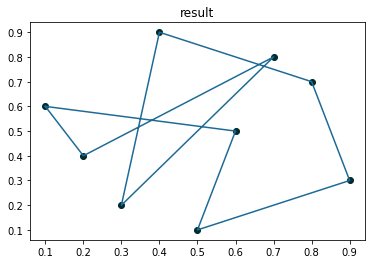

In [19]:
plt.scatter(Best_path[:, 0], Best_path[:, 1], color='#002C2F')
Best_path = np.vstack([Best_path, Best_path[0]])
plt.plot(Best_path[:, 0], Best_path[:, 1], '#1D6A96')
plt.title('result')
plt.show()